In [291]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [239]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
test['Loan_Status'] = 0

In [240]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [241]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [243]:
train.shape

(614, 13)

In [244]:
test.shape

(367, 13)

In [245]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing the Missing Data

In [246]:
print(train.shape)
print(train.dropna().shape)

(614, 13)
(480, 13)


#### Almost 20% observations are with NA values hence we can't afford to drop them with such a small set of data

In [247]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [249]:
train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [250]:
# Since Gender is a categorical column hence imputing it with mode.
train['Gender'].fillna(str(train.Gender.mode()),inplace=True)
test['Gender'].fillna(str(test.Gender.mode()),inplace=True)

In [251]:
train['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [252]:
# Married column is categorical. Mode is the best way to impute it.
train['Married'].fillna(str(train.Married.mode()),inplace=True)
test['Married'].fillna(str(test.Married.mode()),inplace=True)

In [253]:
train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [254]:
# Dependents column is categorical hence imputing with mode value
train['Dependents'].fillna(str(train.Dependents.mode()),inplace=True)
test['Dependents'].fillna(str(test.Dependents.mode()),inplace=True)

In [255]:
train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [256]:
# 'Self_Employed' is categorical, best way to impute is mode
train['Self_Employed'].fillna(str(train.Self_Employed.mode()),inplace=True)
test['Self_Employed'].fillna(str(test.Self_Employed.mode()),inplace=True)

In [257]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

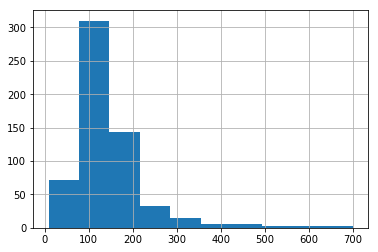

In [258]:
train['LoanAmount'].hist()

In [259]:
# Since data in 'LoanAmount' column seems right skewed hence imputing it with median seems good option.
train['LoanAmount'].fillna(train.LoanAmount.median(),inplace=True)
test['LoanAmount'].fillna(test.LoanAmount.median(),inplace=True)

In [260]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

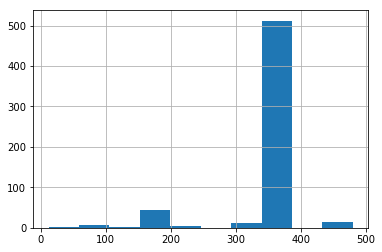

In [261]:
train['Loan_Amount_Term'].hist()

In [262]:
# 'Loan_Amount_Term' seems left skewed hence imputing it with median
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.median(),inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.median(),inplace=True)

##### Changing data type of 'Credit_History' column from float to object

In [263]:
train['Credit_History'] = train['Credit_History'].astype('str')
test['Credit_History'] = test['Credit_History'].astype('str')

In [264]:
train['Credit_History'].describe()

count     614
unique      3
top       1.0
freq      475
Name: Credit_History, dtype: object

In [265]:
# Now since 'Credit_History' a categorical column hence imputing with mode value
train['Credit_History'].fillna(train.Credit_History.mode(),inplace=True)
test['Credit_History'].fillna(test.Credit_History.mode(),inplace=True)

In [266]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [267]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<b>Removing + sign from Dependents column.</b>

In [268]:
train['Dependents'] = train['Dependents'].str.replace("+","")
test['Dependents'] = test['Dependents'].str.replace("+","")

In [269]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Imputing and data cleaning done :) 

### Label Encoding 

In [270]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [277]:
categorical_cols = ['Gender', 'Married', 'Education','Self_Employed',
                    'Credit_History', 'Property_Area', 'Loan_Status']

In [284]:
train_X = train.copy()
test_X = test.copy()

In [285]:
train_X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [286]:
# Encoding categorical variable with label encoding

# for var in categorical_cols:
#     lb = preprocessing.LabelEncoder()
#     full_var_data = pd.concat((train_X[var], test_X[var]), axis=0).astype('str')
#     lb.fit(full_var_data)
#     train_X[var] = lb.transform(train_X[var].astype('str'))
#     if var=='Loan_Status':
#         pass
#     else:
#         test_X[var] = lb.transform(test_X[var].astype('str'))



In [287]:
train_X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,0,1,5849,0.0,128.0,360.0,1,2,2
1,LP001003,2,2,1,0,1,4583,1508.0,128.0,360.0,1,0,1
2,LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1,2,2
3,LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1,2,2
4,LP001008,2,1,0,0,1,6000,0.0,141.0,360.0,1,2,2


In [288]:
train_y = np.array(train_X['Loan_Status'])

In [289]:
# Dropping target variable from train set
train_X = train_X.drop(['Loan_ID','Loan_Status'],axis=1)

### Correlation Matrix to check Multi-collinearity

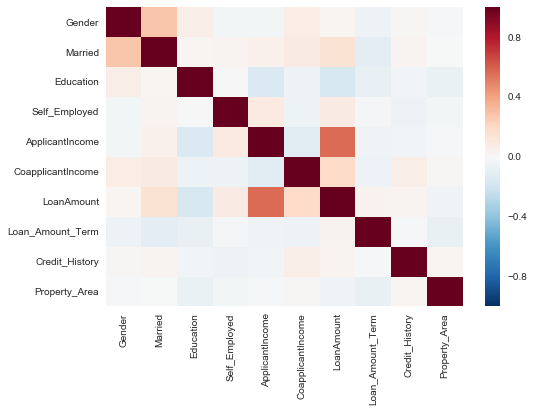

In [294]:
sns.heatmap(train_X.corr())

In [295]:
train_X.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.277459,0.068774,-0.031116,-0.024689,0.073642,0.020731,-0.060198,0.009162,-0.008142
Married,0.277459,1.000000,0.022530,0.030171,0.047691,0.083270,0.141920,-0.103662,0.028879,-0.003370
Education,0.068774,0.022530,1.000000,0.000820,-0.140760,-0.062290,-0.168759,-0.073928,-0.037534,-0.065243
Self_Employed,-0.031116,0.030171,0.000820,1.000000,0.092967,-0.052384,0.082048,-0.017729,-0.055704,-0.028730
ApplicantIncome,-0.024689,0.047691,-0.140760,0.092967,1.000000,-0.116605,0.565181,-0.046531,-0.033996,-0.009500
CoapplicantIncome,0.073642,0.083270,-0.062290,-0.052384,-0.116605,1.000000,0.189218,-0.059383,0.068806,0.010522
LoanAmount,0.020731,0.141920,-0.168759,0.082048,0.565181,0.189218,1.000000,0.036960,0.029688,-0.046632
Loan_Amount_Term,-0.060198,-0.103662,-0.073928,-0.017729,-0.046531,-0.059383,0.036960,1.000000,-0.009121,-0.076120
Credit_History,0.009162,0.028879,-0.037534,-0.055704,-0.033996,0.068806,0.029688,-0.009121,1.000000,0.019582
Property_Area,-0.008142,-0.003370,-0.065243,-0.028730,-0.009500,0.010522,-0.046632,-0.076120,0.019582,1.000000


<b> After looking at correlation matrix and heatmap we can conclude that there is no multicollinearity. So we are good to build our model</b>